In [1]:
import sys
sys.path.append('../')
from matplotlib import rcParams

%config InlineBackend.figure_format = 'retina'

# jtplot.style(context='notebook', fscale=1.0, spines=True, gridlines='--', ticks=True, grid=False, figsize=(10, 8))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Monokai']

import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from nonlocal_smms.core import scattering_matrix

%load_ext autoreload
%autoreload 2

# Trilayers and Bilayers

Here we look at a vacuum/ 4H-SiC bilayer and a vacuum/ AlN/ 4H-SiC system

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


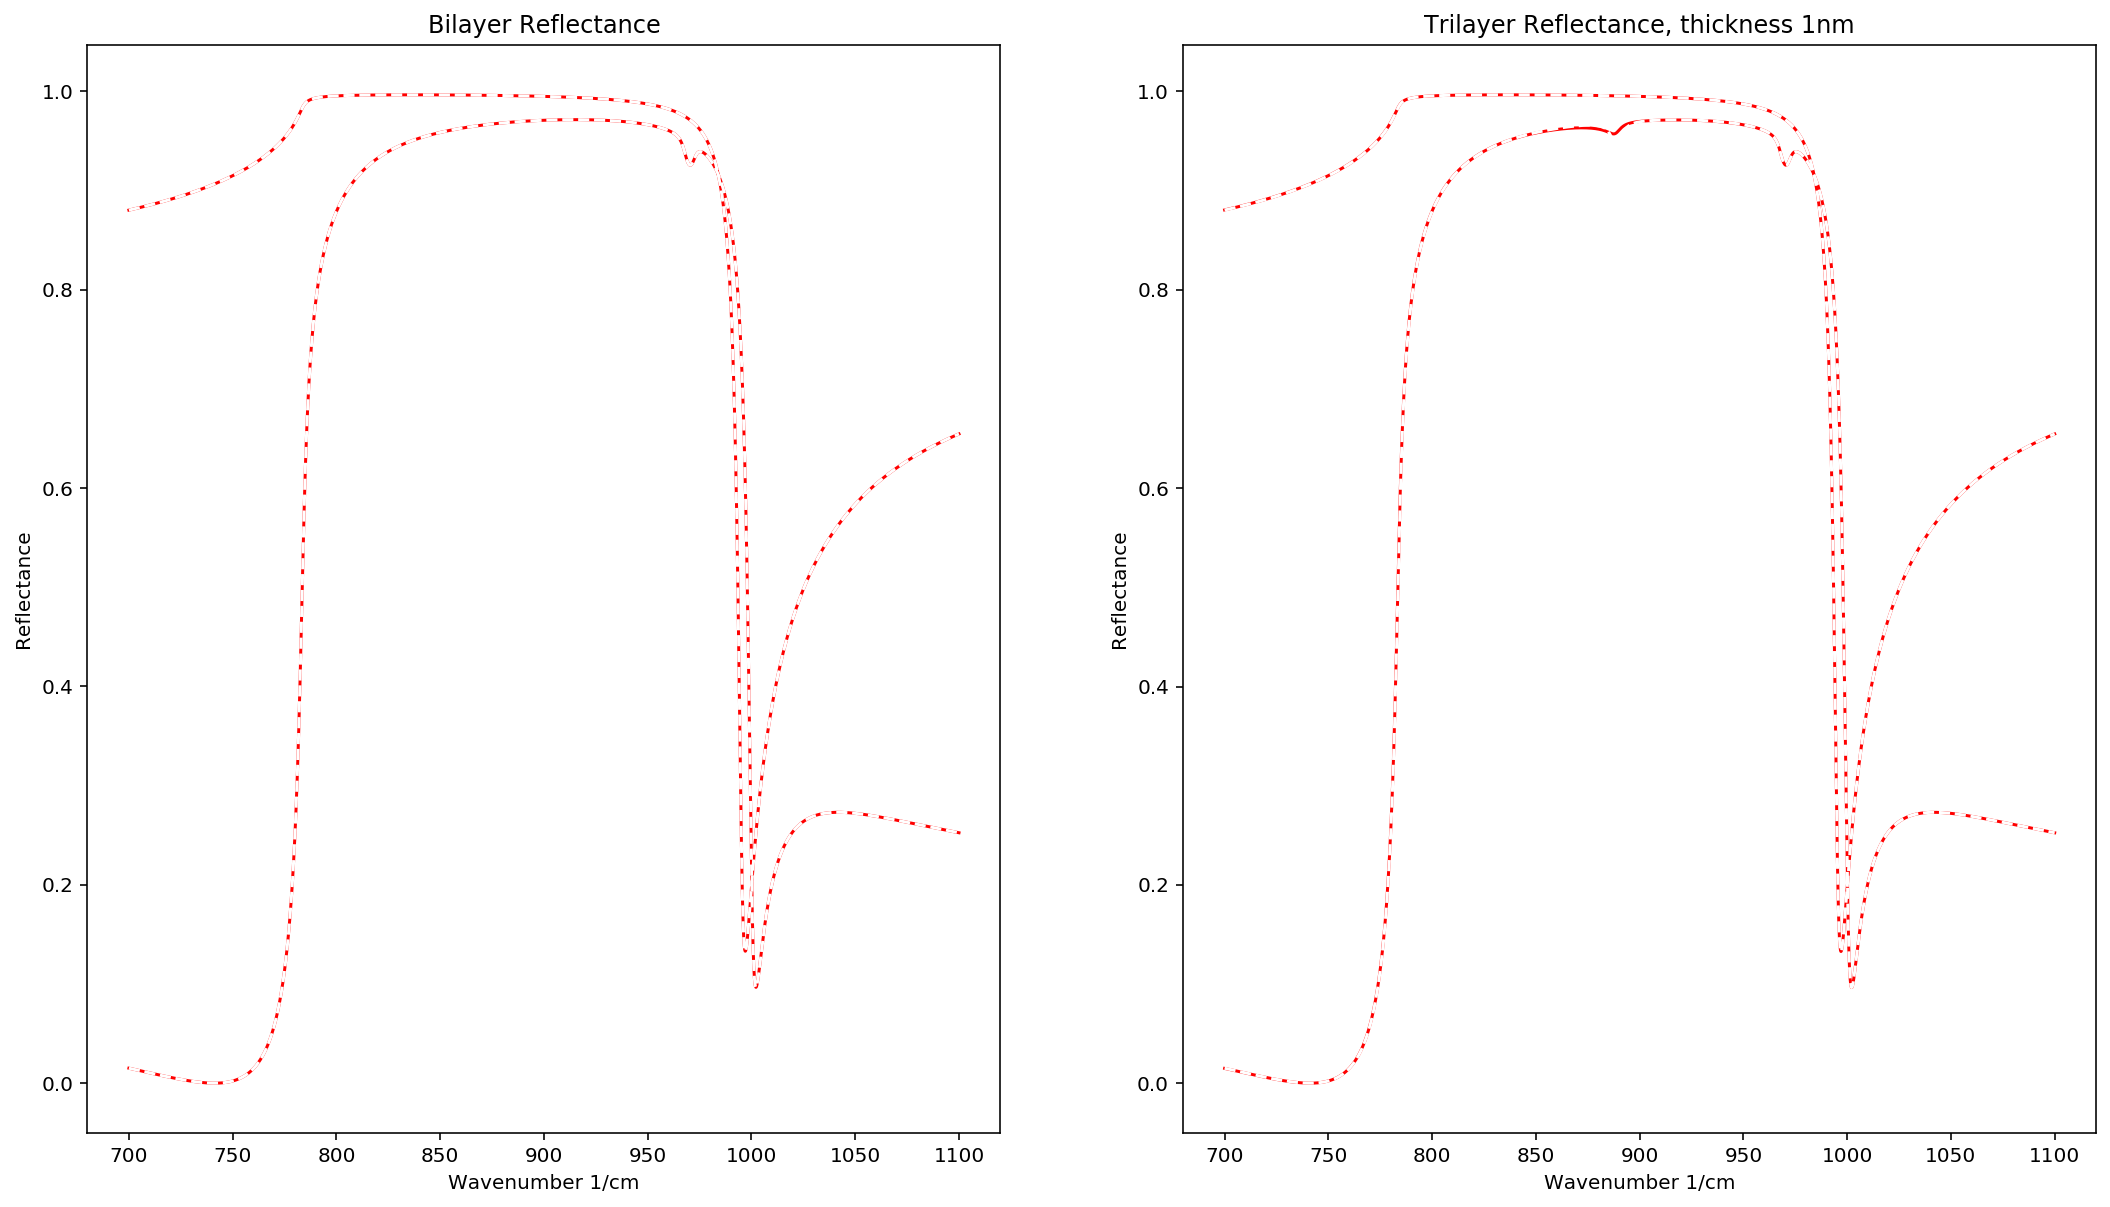

In [5]:
angle = 30

wn = np.linspace(700, 1100, 5000) # Sets a wavenumber range to probe over

hetero = [['vacuum', 0], ['SiC4H', 0]]
rte_loc_bi, rtm_loc_bi = scattering_matrix(wn, hetero, angle=angle, locality='local')
rte_nl_bi, rtm_nl_bi = scattering_matrix(wn, hetero, angle=angle)


thickness = 1e-9
hetero = [['vacuum', 0], ['AlN', thickness], ['SiC4H', 0]]
rte_loc_tri, rtm_loc_tri = scattering_matrix(wn, hetero, angle=angle, locality='local')
rte_nl_tri, rtm_nl_tri = scattering_matrix(wn, hetero, angle=angle)

fig, ((ax1, ax2)) = plt.subplots(figsize=(18, 10), nrows=1, ncols=2, sharex=True)

ax1.plot(wn, np.abs(rte_nl_bi)**2, 'r-')
ax1.plot(wn, np.abs(rtm_nl_bi)**2, 'r-')

ax1.plot(wn, np.abs(rte_loc_bi)**2, 'w--')
ax1.plot(wn, np.abs(rtm_loc_bi)**2, 'w--')
# ax1.set_xlim(850,950)
ax1.set_xlabel('Wavenumber 1/cm')
ax1.set_ylabel('Reflectance')
ax1.set_title('Bilayer Reflectance')

ax2.plot(wn, np.abs(rte_nl_tri)**2, 'r-')
ax2.plot(wn, np.abs(rtm_nl_tri)**2, 'r-')

ax2.plot(wn, np.abs(rte_loc_tri)**2, 'w--')
ax2.plot(wn, np.abs(rtm_loc_tri)**2, 'w--')
# ax2.set_ylim(0.8,1)
ax2.set_xlabel('Wavenumber 1/cm')
ax2.set_ylabel('Reflectance')
ax2.set_title('Trilayer Reflectance, thickness %dnm' %(thickness*1e9))
# ax1.plot(wn, np.abs(Rdu1r[:, 1, 1])**2, 'w--')
# ax1.plot(wn, np.abs(Rdu1r[:, 0, 0])**2, 'w--')

# ax2.plot(wn, np.abs(Rdu2r[:, 1, 1])**2, 'w--')
# ax2.plot(wn, np.abs(Rdu2r[:, 0, 0])**2, 'w--')
plt.show()

In [8]:
bool(np.any(rte_loc_bi))

True

# Stack

Looking at a stack of 25x (2.2nm GaN/ 2.2nm AlN) on a 50nm AlN buffer and a deep 4H-SiC substrate

In [ ]:
angle = 65

wn = np.linspace(700, 1100, 500) # Sets a wavenumber range to probe over


sublatticea = [['GaN', 2.2e-9], ['AlN', 2.2e-9]]

sublatticeb = [['GaN', 1.4e-9], ['AlN', 1.2e-9]]

# superlattice = [sublattice[0] for x in range(25)]
superlatticea = sublatticea*25
superlatticea.insert(0, ['vac', 0])
# superlatticea.insert(len(superlatticea), ['AlN', 25e-9])
superlatticea.insert(len(superlatticea), ['SiC4H', 0])

superlatticeb = sublatticeb*25
superlatticeb.insert(0, ['vac', 0])
# superlatticeb.insert(len(superlatticeb), ['AlN', 25e-9])
superlatticeb.insert(len(superlatticeb), ['SiC4H', 0])


rte_loca, rtm_loca = scattering_matrix(wn, superlatticea, ang=angle, loc=True)
rte_nla, rtm_nla = scattering_matrix(wn, superlatticea, ang=angle)

rte_locb, rtm_locb = scattering_matrix(wn, superlatticeb, ang=angle, loc=True)
rte_nlb, rtm_nlb = scattering_matrix(wn, superlatticeb, ang=angle)

fig, ((ax1, ax2)) = plt.subplots(figsize=(18, 10), nrows=1, ncols=2, sharex=True, sharey=True)

ax1.plot(wn, np.abs(rte_nla)**2, 'g-', label='TE Polarisation, Nonlocal')
ax1.plot(wn, np.abs(rtm_nla)**2, 'r-', label='TM Polarisation, Nonlocal')

ax1.plot(wn, np.abs(rte_loca)**2, 'w--', label='TE Polarisation, Local')
ax1.plot(wn, np.abs(rtm_loca)**2, 'c--', label='TM Polarisation, Local')

ax1.legend(loc='lower center')
ax1.set_xlim(min(wn), max(wn))
# ax1.set_xlim(850,950)
ax1.set_xlabel('Wavenumber 1/cm')
ax1.set_ylabel('Reflectance')
ax1.set_title('Heterostructure A Reflectance')

ax2.plot(wn, np.abs(rte_nlb)**2, 'g-', label='TE Polarisation, Nonlocal')
ax2.plot(wn, np.abs(rtm_nlb)**2, 'r-', label='TM Polarisation, Nonlocal')

ax2.plot(wn, np.abs(rte_locb)**2, 'w--', label='TE Polarisation, Local')
ax2.plot(wn, np.abs(rtm_locb)**2, 'c--', label='TM Polarisation, Local')

ax2.legend(loc='lower center')
ax2.set_xlim(min(wn), max(wn))
ax1.set_ylim(0,1)
ax2.set_xlabel('Wavenumber 1/cm')
ax2.set_ylabel('Reflectance')
ax2.set_title('Heterostructure B Reflectance')

plt.show()

In [ ]:


wn = np.linspace(500, 1050, 500)

sublatticea = [['GaN', 2.2e-9], ['AlN', 2.2e-9]]

sublatticeb = [['GaN', 1.4e-9], ['AlN', 1.0e-9]]

# superlattice = [sublattice[0] for x in range(25)]
superlatticea = sublatticea*25
superlatticea.insert(0, ['vac', 0])
superlatticea.insert(len(superlatticea), ['AlN', 50e-9])
superlatticea.insert(len(superlatticea), ['SiC4H', 0])

superlatticeb = sublatticeb*250
superlatticeb.insert(0, ['vac', 0])
# superlatticeb.insert(len(superlatticeb), ['AlN', 25e-9])
superlatticeb.insert(len(superlatticeb), ['SiC4H', 0])

rte_loca, rtm_loca = scattering_matrix(wn, superlatticea, ang=angle, loc=True)
rte_nla, rtm_nla = scattering_matrix(wn, superlatticea, ang=angle)

rte_locb, rtm_locb = scattering_matrix(wn, superlatticeb, ang=angle, loc=True)
rte_nlb, rtm_nlb = scattering_matrix(wn, superlatticeb, ang=angle)

fig, (ax1, ax2) = plt.subplots(figsize=(18, 10), nrows=2, ncols=1, sharex=True, sharey=True)

ax1.plot(wn, np.abs(rte_nla)**2, 'g-', label='TE Polarisation, Nonlocal')
ax1.plot(wn, np.abs(rtm_nla)**2, 'r-', label='TM Polarisation, Nonlocal')

ax1.plot(wn, np.abs(rte_loca)**2, 'w--', label='TE Polarisation, Local')
ax1.plot(wn, np.abs(rtm_loca)**2, 'c--', label='TM Polarisation, Local')

ax1.legend(loc='lower right')
ax1.set_xlim(min(wn), max(wn))
# ax1.set_xlim(850,950)
ax1.set_xlabel('Wavenumber 1/cm')
ax1.set_ylabel('Reflectance')
ax1.set_title('Heterostructure A Reflectance')

ax2.plot(wn, np.abs(rte_nlb)**2, 'g-', label='TE Polarisation, Nonlocal')
ax2.plot(wn, np.abs(rtm_nlb)**2, 'r-', label='TM Polarisation, Nonlocal')

ax2.plot(wn, np.abs(rte_locb)**2, 'w--', label='TE Polarisation, Local')
ax2.plot(wn, np.abs(rtm_locb)**2, 'c--', label='TM Polarisation, Local')

ax2.legend(loc='lower right')
ax2.set_xlim(min(wn), max(wn))
ax1.set_ylim(0,1.1)
ax2.set_xlabel('Wavenumber 1/cm')
ax2.set_ylabel('Reflectance')
ax2.set_title('Heterostructure B Reflectance')

plt.savefig('Simonefig.pdf')
plt.show()

In [ ]:
from scipy.constants import speed_of_light

nu2 = 1e4/speed_of_light
wl = 893
convb = 0.01/2/np.pi
convs = 2*np.pi/(0.01) # Conversion factor

def w_n(n, d_s):
    return np.sqrt(wl**2 - (n*nu2/d_s*0.01/2)**2)

def w_n(n, d_s):
    return np.sqrt(wl**2-(n*nu2/d_s*0.01/2)**2+0j)
# print(w_n(0, 0.2e-9),w_n(1, 0.2e-9),w_n(2, 0.2e-9))

d_st = 1.2e-9
print(w_n(0, d_st),w_n(1, d_st),w_n(2, d_st))
d_st = 2.4e-9
print(w_n(0, d_st),w_n(1, d_st),w_n(2, d_st))

In [ ]:
x = 'GaAs'

print('The material ' + x + """ is not present in the material database.
    A list of included materials can be accessed by typing ...
                """
                )

In [ ]:
from scipy.constants import e, hbar, Boltzmann

omega_lo = 8e12
e_lo = hbar*omega_lo

print(e_lo/e, Boltzmann*300/e)

In [ ]:
E_max = 1
E_min = 0
energy_grid = np.linspace(E_min, E_max, 50)

energy_grid

In [ ]:
E_max = 20*Boltzmann*300/e

E_min = -5
energy_grid = np.linspace(E_min, E_max, 1000
                        )

energy_grid